In [ ]:
import csv
import pandas as pd

In [ ]:
df = pd.read_csv('Groceries_dataset.csv')

In [ ]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
print("Dataset Dimension : ",df.shape)
print("Dataset Size : ",df.size)



Dataset Dimension :  (38765, 3)
Dataset Size :  116295


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df['Member_number'].nunique()

3898

Calculate Item frequency

In [ ]:
itemFrequency = df['itemDescription'].value_counts().sort_values(ascending=False)
itemFrequency.head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

Association Rule Mining

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori
def encoder(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

apriori_data = df.groupby(['Member_number','itemDescription'])['itemDescription'].count().reset_index(name ='Count')
apriori_data

,Member_number,itemDescription,Count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
...,...,...,...
34761,5000,onions,1
34762,5000,other vegetables,1
34763,5000,root vegetables,1
34764,5000,semi-finished bread,1


In [ ]:
#we are creating a pivot_table (A PivotTable is an interactive way to quickly summarize large amounts of data.)
apriori_basket = apriori_data.pivot_table(index = 'Member_number', columns = 'itemDescription', values = 'Count', aggfunc = 'sum').fillna(0)
#we apply the map encoder
apriori_basket_set = apriori_basket.applymap(encoder)
apriori_basket_set.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#analyze the rules with min_support 50% and then for 50% min_confidence respectively. 

In [ ]:
from mlxtend.frequent_patterns import association_rules


f_items = apriori(apriori_basket_set, min_support = 0.05, use_colnames = True)
f_items

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
160,0.050539,"(other vegetables, whole milk, tropical fruit)"
161,0.071832,"(other vegetables, whole milk, yogurt)"
162,0.065162,"(whole milk, soda, rolls/buns)"
163,0.065931,"(whole milk, yogurt, rolls/buns)"


In [ ]:
apriori_rules = association_rules(f_items, metric = 'lift', min_threshold = 0.05)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
195,"(bottled water, other vegetables)",(whole milk),0.093894,0.458184,0.056183,0.598361,1.305941,0.013162,1.349012
237,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
250,"(yogurt, rolls/buns)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420,0.014917,1.328521
208,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,0.014859,1.229837
256,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,0.009720,1.225537
...,...,...,...,...,...,...,...,...,...
80,(whole milk),(frozen vegetables),0.458184,0.102617,0.055156,0.120381,1.173110,0.008139,1.020195
257,(whole milk),"(yogurt, soda)",0.458184,0.097486,0.054387,0.118701,1.217622,0.009720,1.024073
234,(whole milk),"(tropical fruit, other vegetables)",0.458184,0.091329,0.050539,0.110302,1.207749,0.008693,1.021326
223,(whole milk),"(sausage, other vegetables)",0.458184,0.092868,0.050282,0.109742,1.181702,0.007732,1.018954


for 7 percent and 6 percent

In [ ]:
f_items = apriori(apriori_basket_set, min_support = 0.07, use_colnames = True)
f_items

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.158799,(bottled beer)
4,0.213699,(bottled water)
...,...,...
78,0.075680,"(tropical fruit, yogurt)"
79,0.079785,"(whole milk, whipped/sour cream)"
80,0.150590,"(whole milk, yogurt)"
81,0.082093,"(whole milk, other vegetables, rolls/buns)"


In [ ]:
apriori_rules = association_rules(f_items, metric = 'lift', min_threshold = 0.06)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
88,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,0.014859,1.229837
70,(shopping bags),(whole milk),0.168291,0.458184,0.091329,0.542683,1.184422,0.014220,1.184772
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
85,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
...,...,...,...,...,...,...,...,...,...
89,(whole milk),"(other vegetables, rolls/buns)",0.458184,0.146742,0.082093,0.179171,1.220996,0.014859,1.039508
82,(whole milk),(whipped/sour cream),0.458184,0.154695,0.079785,0.174132,1.125650,0.008906,1.023536
20,(whole milk),(newspapers),0.458184,0.139815,0.072345,0.157895,1.129310,0.008284,1.021469
96,(whole milk),"(other vegetables, yogurt)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235


In [ ]:
print(apriori_rules)

                       antecedents                     consequents  \
93      (other vegetables, yogurt)                    (whole milk)   
88  (other vegetables, rolls/buns)                    (whole milk)   
70                 (shopping bags)                    (whole milk)   
1                   (bottled beer)                    (whole milk)   
85                        (yogurt)                    (whole milk)   
..                             ...                             ...   
89                    (whole milk)  (other vegetables, rolls/buns)   
82                    (whole milk)            (whipped/sour cream)   
20                    (whole milk)                    (newspapers)   
96                    (whole milk)      (other vegetables, yogurt)   
19                    (whole milk)                 (domestic eggs)   

    antecedent support  consequent support   support  confidence      lift  \
93            0.120318            0.458184  0.071832    0.597015  1.303003   
88 

In [ ]:
support=apriori_rules['support']
confidence=apriori_rules['confidence']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


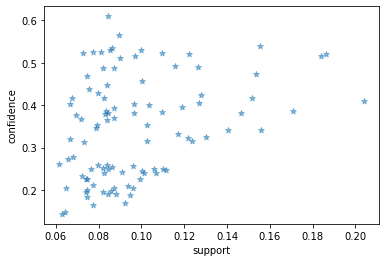

In [ ]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


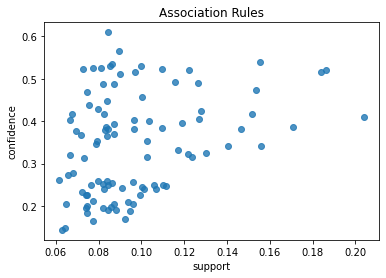

In [ ]:
import seaborn as sns1
 
for i in range (len(support)):
    support[i] = support[i] 
    confidence[i] = confidence[i] 
     
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns1.regplot(x=support, y=confidence, fit_reg=False)

